In [11]:
import numpy as np
import pandas as pd 
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn import datasets
from tensorflow.keras import utils

In [2]:
# system data
train_dir = './images/train'
test_dir = './images/test'
valid_dir = './images/valid'

# images will be rescaled by 1./255
train_data_generation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                                        shear_range=0.2, 
                                                                        zoom_range=0.2, 
                                                                        horizontal_flip=True)

test_data_generation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# images in batches of 10
# number of samples processed before the model is updated
train_generator = train_data_generation.flow_from_directory(train_dir, target_size=(200, 200), 
                                                            batch_size=10, class_mode='categorical')

validation_generator = test_data_generation.flow_from_directory(valid_dir, target_size=(200, 200), 
                                                                batch_size=10, class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [3]:
# training a model with 98% accuracy
class get_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [4]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')])

model.summary()

2022-03-31 18:17:12.189268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-31 18:17:12.189346: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 18:17:12.189399: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wolli): /proc/driver/nvidia/version does not exist
2022-03-31 18:17:12.202927: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
print('Compiled!')

callbacks = get_Callback()
history = model.fit(train_generator, batch_size = 32, epochs=20, validation_data=validation_generator, callbacks=[callbacks], verbose=1, shuffle=True)

Compiled!
Epoch 1/20
166/166 [==============================] - 102s 599ms/step - loss: 1.7103 - accuracy: 0.3623 - val_loss: 1.9186 - val_accuracy: 0.5278
Epoch 2/20
166/166 [==============================] - 101s 605ms/step - loss: 1.0915 - accuracy: 0.6008 - val_loss: 0.7024 - val_accuracy: 0.8056
Epoch 3/20
166/166 [==============================] - 100s 601ms/step - loss: 0.7923 - accuracy: 0.7373 - val_loss: 0.2942 - val_accuracy: 0.9306
Epoch 4/20
166/166 [==============================] - 100s 603ms/step - loss: 0.5971 - accuracy: 0.8122 - val_loss: 0.2604 - val_accuracy: 0.9306
Epoch 5/20
166/166 [==============================] - 100s 600ms/step - loss: 0.5565 - accuracy: 0.8339 - val_loss: 0.0732 - val_accuracy: 0.9861
Epoch 6/20
166/166 [==============================] - 104s 628ms/step - loss: 0.4818 - accuracy: 0.8575 - val_loss: 0.1436 - val_accuracy: 0.9583
Epoch 7/20
166/166 [==============================] - 101s 610ms/step - loss: 0.4066 - accuracy: 0.8714 - val_loss

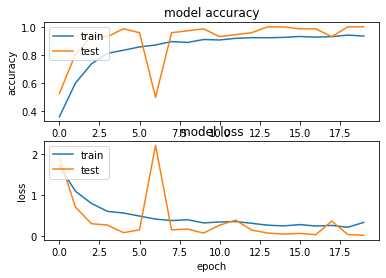

In [6]:
# plotting graphs
plt.figure(1)  
# history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
# history for loss    
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [12]:
def get_load_dataset(path):
    data = sk.datasets.load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [13]:
x_test, y_test, target_labels = get_load_dataset(test_dir)

number_of_classes = len(np.unique(y_test))
number_of_classes

y_test = tf.keras.utils.to_categorical(y_test,number_of_classes)

In [16]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(file)))
    return images_as_array


x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [17]:
x_test2 = x_test.astype('float32')/255

# visualize test prediction.
y_pred = model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

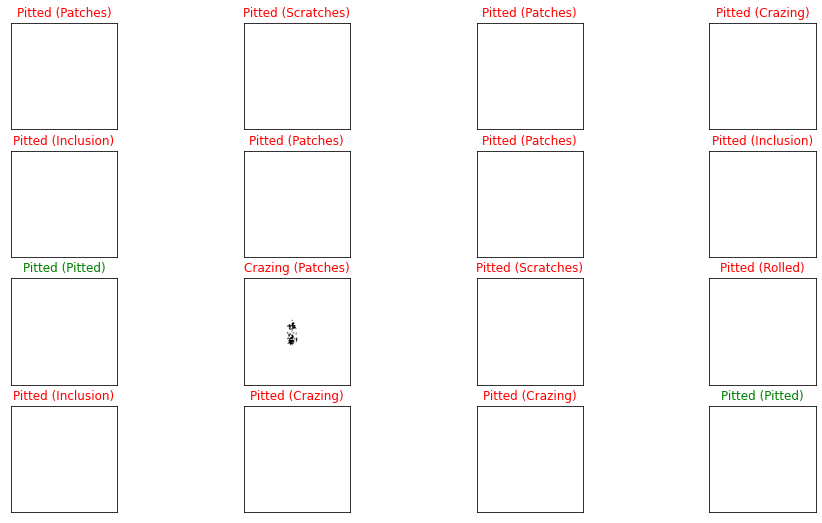

In [20]:
# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

7